<center>
<h1> Credit Risk Analytics
</center>

###### Definition of Target and Outcome Window:
One of the leading banks would like to predict bad customer while customer applying for loan. This model also called as PD Models (Probability of Default)


###### Data Pre-Processing - 
    - Missing Values Treatment - Numerical (Mean/Median imputation) and Categorical (Separate Missing Category or Merging)
    - Univariate Analysis - Outlier and Frequency Analysis
###### Data Exploratory Analysis
    - Bivariate Analysis - Numeric(TTest) and Categorical(Chisquare)
    - Bivariate Analysis - Visualization
    - Variable Transformation - P-Value based selection
    - Variable Transformation - Bucketing / Binning for numerical variables and Dummy for Categorical Variables
    - Variable Reduction - IV / Somers'D
    - Variable Reduction - Multicollinearity
###### Model Build and Model Diagnostics
    - Train and Test split
    - Significance of each Variable
    - Gini and ROC / Concordance analysis - Rank Ordering
    - Classification Table Analysis - Accuracy

###### Model Validation
    - OOS validation - p-value and sign testing for the model coefficients
    - Diagnostics check to remain similar to Training Model build
    - BootStrapping, if necessary
###### Model Interpretation for its properties
    - Inferencing for finding the most important contributors
    - Prediction of risk and proactive prevention by targeting segments of the population

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.formula.api as sm
import scipy.stats as stats
import pandas_profiling  #need to install using anacond prompt (pip install pandas-profiling)

%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = True
plt.gray()

from matplotlib.backends.backend_pdf import PdfPages

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

<Figure size 720x540 with 0 Axes>

In [5]:
bankloans = pd.read_csv('C:/Users/abgautam/Documents/Abhishek/bankloans.csv')

In [6]:
bankloans.head(2)

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0


In [7]:
bankloans.columns

Index(['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt',
       'othdebt', 'default'],
      dtype='object')

In [8]:
bankloans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 9 columns):
age         850 non-null int64
ed          850 non-null int64
employ      850 non-null int64
address     850 non-null int64
income      850 non-null int64
debtinc     850 non-null float64
creddebt    850 non-null float64
othdebt     850 non-null float64
default     700 non-null float64
dtypes: float64(4), int64(5)
memory usage: 59.9 KB


In [9]:
bankloans_report = pandas_profiling.ProfileReport(bankloans)

In [10]:
bankloans_report.to_file('bankloans_report.html')

In [11]:
numeric_var_names = [key for key in dict(bankloans.dtypes) if dict(bankloans.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_names = [key for key in dict(bankloans.dtypes) if dict(bankloans.dtypes)[key] in ['object']]
print(numeric_var_names)
print(cat_var_names)

['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt', 'othdebt', 'default']
[]


In [12]:
bankloans_num = bankloans[numeric_var_names]
bankloans_num.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


In [13]:
bankloans_cat = bankloans[cat_var_names]
bankloans_cat.head()

""
0
1
2
3
4


In [14]:
# Creating Data audit Report
# Use a general function that returns multiple values
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.std()/x.mean(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'CV','MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_summary=bankloans_num.apply(lambda x: var_summary(x)).T

In [15]:
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,CV,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
age,850.0,0.0,29775.000000,35.029412,34.000000,8.041432,64.664623,0.229562,20.000000,21.000000,23.000000,25.000000,29.000000,34.000000,41.000000,47.000000,49.000000,53.000000,56.00000
ed,850.0,0.0,1454.000000,1.710588,1.000000,0.927784,0.860783,0.542377,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,3.000000,4.000000,4.000000,5.00000
employ,850.0,0.0,7281.000000,8.565882,7.000000,6.777884,45.939706,0.791265,0.000000,0.000000,0.000000,1.000000,3.000000,7.000000,13.000000,18.000000,21.550000,29.000000,33.00000
address,850.0,0.0,7116.000000,8.371765,7.000000,6.895016,47.541251,0.823604,0.000000,0.000000,0.000000,1.000000,3.000000,7.000000,12.000000,19.000000,22.550000,26.510000,34.00000
income,850.0,0.0,39674.000000,46.675294,35.000000,38.543054,1485.566998,0.825770,13.000000,14.490000,17.000000,19.000000,24.000000,35.000000,55.750000,84.000000,115.550000,220.510000,446.00000
debtinc,850.0,0.0,8645.900000,10.171647,8.700000,6.719441,45.150891,0.660605,0.100000,0.900000,1.900000,2.900000,5.100000,8.700000,13.800000,19.200000,23.510000,31.565000,41.30000
creddebt,850.0,0.0,1340.284021,1.576805,0.885091,2.125840,4.519196,1.348195,0.011696,0.030349,0.108927,0.178306,0.382176,0.885091,1.898440,3.703304,5.348674,10.285997,20.56131
othdebt,850.0,0.0,2616.970979,3.078789,2.003243,3.398803,11.551864,1.103941,0.045584,0.162394,0.359900,0.552050,1.045942,2.003243,3.903001,7.111941,9.481105,16.931503,35.19750
default,700.0,150.0,183.000000,0.261429,0.000000,0.439727,0.193360,1.682016,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [16]:
bankloans_existing = bankloans_num[bankloans_num.default.isnull()==0]
bankloans_new = bankloans_num[bankloans_num.default.isnull()==1]

In [17]:
bankloans_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 700 to 849
Data columns (total 9 columns):
age         150 non-null int64
ed          150 non-null int64
employ      150 non-null int64
address     150 non-null int64
income      150 non-null int64
debtinc     150 non-null float64
creddebt    150 non-null float64
othdebt     150 non-null float64
default     0 non-null float64
dtypes: float64(4), int64(5)
memory usage: 11.7 KB


In [18]:
#Handling Outliers
def outlier_capping(x):
    x=x.clip_upper(x.quantile(0.99))
    x=x.clip_lower(x.quantile(0.01))
    return x
bankloans_existing=bankloans_existing.apply(lambda x: outlier_capping(x))

In [19]:
#Handling Missings
def Missing_imputation(x):
    x=x.fillna(x.mean())
    return x
bankloans_existing=bankloans_existing.apply(lambda x: Missing_imputation(x))

In [20]:
bankloans_existing.corr()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
age,1.000000,0.016576,0.537417,0.596973,0.521450,0.016926,0.308318,0.348911,-0.138654
ed,0.016576,1.000000,-0.158071,0.055560,0.225395,0.009992,0.103012,0.156523,0.118521
employ,0.537417,-0.158071,1.000000,0.324859,0.665369,-0.035332,0.405959,0.419337,-0.287197
address,0.596973,0.055560,0.324859,1.000000,0.345067,0.014967,0.215397,0.234896,-0.165389
income,0.521450,0.225395,0.665369,0.345067,1.000000,-0.022541,0.553114,0.626787,-0.099553
debtinc,0.016926,0.009992,-0.035332,0.014967,-0.022541,1.000000,0.534602,0.603630,0.388556
creddebt,0.308318,0.103012,0.405959,0.215397,0.553114,0.534602,1.000000,0.639984,0.238179
othdebt,0.348911,0.156523,0.419337,0.234896,0.626787,0.603630,0.639984,1.000000,0.138962
default,-0.138654,0.118521,-0.287197,-0.165389,-0.099553,0.388556,0.238179,0.138962,1.000000


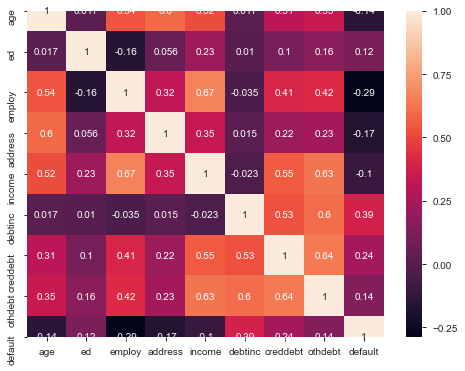

In [26]:
# visualize correlation matrix in Seaborn using a heatmap
plt.subplots(figsize=(8,6))
data=bankloans_existing.corr()
sns.heatmap(data, annot=True)

###### 2.4 Data Exploratory Analysis
    - Variable Transformation: (i) Bucketing

In [28]:
bankloans_existing.columns.difference(['default'])

Index(['address', 'age', 'creddebt', 'debtinc', 'ed', 'employ', 'income',
       'othdebt'],
      dtype='object')

### Will calculate log(odds) which is log of odds ratio and will plot on bar graph

    - Using bar graph will determine which variable is important and which is not.
    - If bar log(odds) is more or less similar then that vairable is of least importance.
    - if log(odds) is either showing linearity or carrying different value then that variable is important.
    - Based on value of log(odds) we can group variable into few groups based on similar values.

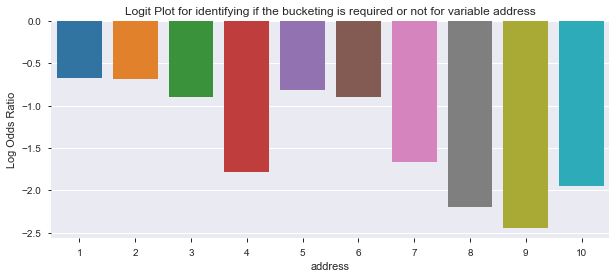

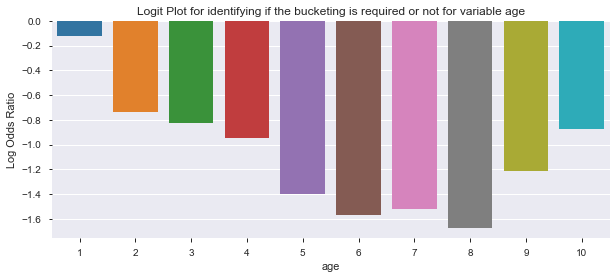

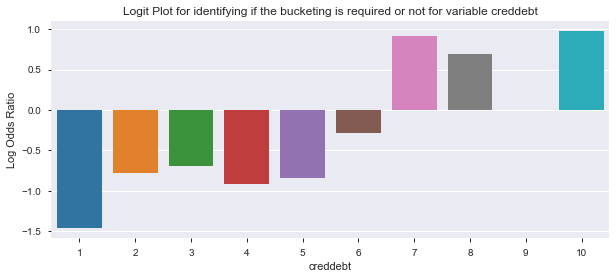

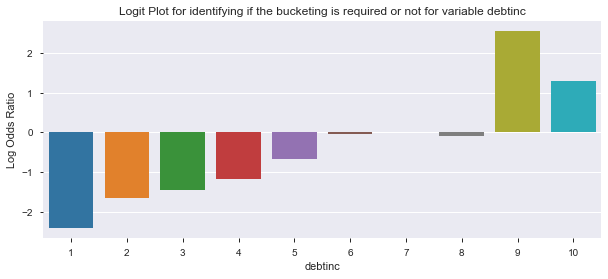

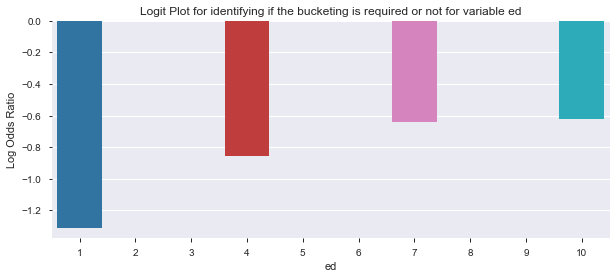

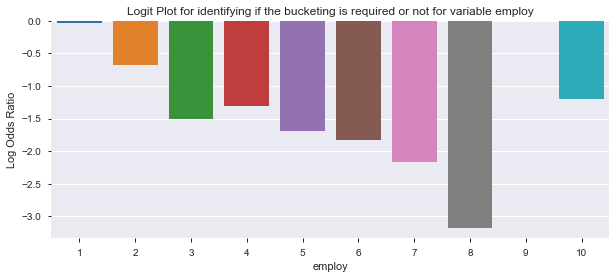

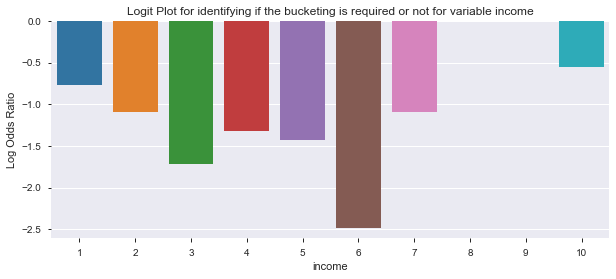

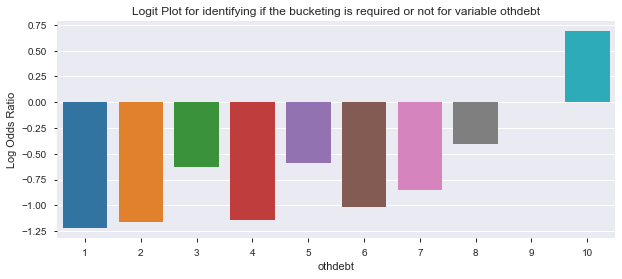

In [41]:
bp = PdfPages('Transformation Plots.pdf')

for num_variable in bankloans_existing.columns.difference(['default']):
    binned = pd.cut(bankloans_existing[num_variable], bins=10, labels=list(range(1,11)))
    #calculating odds ratio which is probability of 1 / probability of 0
    #sum() - will calculate value for default having value 1 
    #count()-sum() - will calculate total value - value for default having value 1 - In short will calculate value for 0
    odds = bankloans_existing.groupby(binned)['default'].sum() / (bankloans_existing.groupby(binned)['default'].count()-bankloans_existing.groupby(binned)['default'].sum())
    log_odds = np.log(odds)
    fig,axes = plt.subplots(figsize=(10,4))
    sns.barplot(x=log_odds.index,y=log_odds)
    plt.ylabel('Log Odds Ratio')
    plt.title(str('Logit Plot for identifying if the bucketing is required or not for variable ') + str(num_variable))
    bp.savefig(fig)

bp.close()

#### Based on above graph, we can group variables in differnt groups -
#### Address can be grouped as below -
    - First three bins in one group
    - Fourth bin in one group
    - 5th and 6th bin in one group
    - 7-9 bin in one group
    - 10th bin in one group

#### Similarly Age can be grouped -
    - 1-4 bin in one group (May be young age group)
    - 5-8 bin in one group (May be middle age group)
    - 9-10 bin in another group (May be in senior age group)
  
#### Similary creddebt graph shows when credit increases value is positive which means bad customer.

#### Education is not carrying much importance according to graph

######  Data Exploratory Analysis
    - Variable Reduction using Somer's D values

##### Will calculate univariate analysis 
    - Will calculate relationship between individual X variable with Y variable.

In [46]:
bankloans_existing.columns

Index(['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt',
       'othdebt', 'default'],
      dtype='object')

In [47]:
import statsmodels.formula.api as sm

###### calculating Somer's d value for "address" variable.

In [48]:
logreg_model = sm.logit('default~address', data=bankloans_existing).fit()

Optimization terminated successfully.
         Current function value: 0.559856
         Iterations 5


In [49]:
p = logreg_model.predict(bankloans_existing)

In [50]:
metrics.roc_auc_score(bankloans_existing['default'],p)

0.6111921446766232

#### Somer's D = 2*roc_auc_score - 1
    - if Somer's D is high that variable is more important

In [51]:
2*metrics.roc_auc_score(bankloans_existing['default'], p)-1

0.2223842893532464

###### calculating Somer's d value for all individual variable.

In [52]:
somersd_df = pd.DataFrame()
for num_vairable in bankloans_existing.columns.difference(['default']):
    logreg=sm.logit(formula=str('default ~')+str(num_vairable), data=bankloans_existing)
    result = logreg.fit()
    y_score = pd.DataFrame(result.predict())
    y_score.columns = ['Score']
    somers_d = 2*metrics.roc_auc_score(bankloans_existing['default'],y_score) - 1
    temp = pd.DataFrame([num_vairable,somers_d]).T
    temp.columns = ['Variable Name','SomersD']
    somersd_df = pd.concat([somersd_df, temp], axis=0)
    
somersd_df

Optimization terminated successfully.
         Current function value: 0.559856
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.564673
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.548956
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.501389
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.567774
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.527166
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.569055
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.565619
         Iterations 5


,Variable Name,SomersD
0,address,0.222384
0,age,0.206329
0,creddebt,0.272378
0,debtinc,0.470506
0,ed,0.148302
0,employ,0.409138
0,income,0.200273
0,othdebt,0.173806


In [53]:
somersd_df.sort_values(by='SomersD', ascending=False)

,Variable Name,SomersD
0,debtinc,0.470506
0,employ,0.409138
0,creddebt,0.272378
0,address,0.222384
0,age,0.206329
0,income,0.200273
0,othdebt,0.173806
0,ed,0.148302


### Somer's D can help in selecting variables based on below conditions -
    - We can select variables having Somer's d value greater than 0.1 or 0.2
    - Can select top 50% variables
    - Can select top 10 or 15 variables based on project

### According to above table, below columns are more imptotant -
    - debtinc
    - employ
    - credebt
    - address
    - age
    - income

In [54]:
## Variance Inflation Factor assessment
X = pd.concat([bankloans_existing[bankloans_existing.columns.difference(['default'])],bankloans_existing['default']], axis=1)
features = "+".join(bankloans_existing.columns.difference(['default']))
X.head()

,address,age,creddebt,debtinc,ed,employ,income,othdebt,default
0,12.0,41.0,9.891428,9.3,3,17.0,176.0,5.008608,1.0
1,6.0,27.0,1.362202,17.3,1,10.0,31.0,4.000798,0.0
2,14.0,40.0,0.856075,5.5,1,15.0,55.0,2.168925,0.0
3,14.0,41.0,2.658720,2.9,1,15.0,120.0,0.821280,0.0
4,0.0,24.0,1.787436,17.3,2,2.0,28.0,3.056564,1.0


In [55]:
features

'address+age+creddebt+debtinc+ed+employ+income+othdebt'

In [56]:
a,b = dmatrices(formula_like='default ~'+'address+age+creddebt+debtinc+employ+income', data=X, return_type='dataframe')
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(b.values, i) for i in range(b.shape[1])]
vif["features"] = b.columns

print(vif)

   VIF Factor   features
0   28.286222  Intercept
1    1.559236    address
2    2.036933        age
3    2.564921   creddebt
4    1.778339    debtinc
5    1.997947     employ
6    2.601717     income


##### If we take VIF cut-off has 2, we can drop income variable.

In [57]:
a,b = dmatrices(formula_like='default ~'+'address+age+creddebt+debtinc+employ', data=X, return_type='dataframe')
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(b.values, i) for i in range(b.shape[1])]
vif["features"] = b.columns

print(vif)

   VIF Factor   features
0   28.170665  Intercept
1    1.557219    address
2    1.966746        age
3    1.903500   creddebt
4    1.570261    debtinc
5    1.673062     employ


#### Train and Test split

In [61]:
train, test = train_test_split(bankloans_existing, test_size = 0.3, random_state = 42)
train.columns

Index(['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt',
       'othdebt', 'default'],
      dtype='object')

## Bulding logistic regression

In [62]:
logreg = sm.logit(formula='default ~ address+age+creddebt+debtinc+employ', data=train)
result = logreg.fit()

Optimization terminated successfully.
         Current function value: 0.427051
         Iterations 7


In [63]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                  490
Model:                          Logit   Df Residuals:                      484
Method:                           MLE   Df Model:                            5
Date:                Wed, 27 Nov 2019   Pseudo R-squ.:                  0.2721
Time:                        11:15:17   Log-Likelihood:                -209.26
converged:                       True   LL-Null:                       -287.47
Covariance Type:            nonrobust   LLR p-value:                 5.690e-32
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.7615      0.584     -3.018      0.003      -2.905      -0.618
address       -0.0839      0.025     -3.305      0.001      -0.134      -0.034
age            0.0392      0.020      1.953      0.0

### In above model, P value is either less than 0.05 or around 0.05, so will consider all variables
#### Formula will be :
    •LE = -1.7615 -0.0839address+0.0392age+0.5996creddebt+0.0710debtinc-0.2541*employ
    •p(Default=1) = exp(LE)/(1+exp(LE))

In [64]:
train_gini = 2*metrics.roc_auc_score(train['default'], result.predict(train)) - 1
print("The Gini Index for the model built on the Train Data is : ", train_gini)

test_gini = 2*metrics.roc_auc_score(test['default'], result.predict(test)) - 1
print("The Gini Index for the model built on the Test Data is : ", test_gini)

The Gini Index for the model built on the Train Data is :  0.676421264464196
The Gini Index for the model built on the Test Data is :  0.7771580681962227


In [65]:
train_auc = metrics.roc_auc_score(train['default'], result.predict(train))
test_auc = metrics.roc_auc_score(test['default'], result.predict(test))

print("The AUC for the model built on the Train Data is : ", train_auc)
print("The AUC for the model built on the Test Data is : ", test_auc)
                                 

The AUC for the model built on the Train Data is :  0.838210632232098
The AUC for the model built on the Test Data is :  0.8885790340981113


In [66]:
## Intuition behind ROC curve - predicted probability as a tool for separating the '1's and '0's
train_predicted_prob = pd.DataFrame(result.predict(train))
train_predicted_prob.columns = ['Prob']
train_actual = train['default']
#Making a dataframe with actual and probability
train_predict = pd.concat([train_actual,train_predicted_prob], axis=1)
train_predict.columns = ['actual','prob']
train_predict.head()

,actual,prob
357,1.0,0.585803
649,0.0,0.529728
291,0.0,0.060701
420,1.0,0.599717
177,0.0,0.130221


In [67]:
## Intuition behind ROC curve - predicted probability as a tool for separating the '1's and '0's
test_predicted_prob = pd.DataFrame(result.predict(test))
test_predicted_prob.columns = ["prob"]
test_actual = test['default']
#Making a dataframe with actual and probability
test_predict = pd.concat([test_actual,test_predicted_prob], axis=1)
test_predict.columns = ['actual', 'prob']
test_predict.head()

,actual,prob
158,1.0,0.213639
500,0.0,0.462511
396,0.0,0.058998
155,0.0,0.296444
321,1.0,0.300336


### Let's suppose 0.2 is cut off and based on that we will calculate accuracy, sensitivity,specificity

In [69]:
train_predict['predicted'] = train_predict['prob'].apply(lambda x: 0.0 if x<0.2 else 1.0)

In [70]:
train_predict.head()

,actual,prob,predicted
357,1.0,0.585803,1.0
649,0.0,0.529728,1.0
291,0.0,0.060701,0.0
420,1.0,0.599717,1.0
177,0.0,0.130221,0.0


### Based on above table, we will decide tp, tn, fp & fn

In [73]:
train_predict['tp'] = train_predict.apply(lambda x: 1.0 if x['actual']==1.0 and x['predicted']==1.0 else 0.0, axis=1)
train_predict['fp'] = train_predict.apply(lambda x: 1.0 if x['actual']==0.0 and x['predicted']==1.0 else 0.0, axis=1)
train_predict['tn'] = train_predict.apply(lambda x: 1.0 if x['actual']==0.0 and x['predicted']==0.0 else 0.0, axis=1)
train_predict['fn'] = train_predict.apply(lambda x: 1.0 if x['actual']==1.0 and x['predicted']==0.0 else 0.0, axis=1)

In [74]:
train_predict.head()

,actual,prob,predicted,tp,fp,tn,fn
357,1.0,0.585803,1.0,1.0,0.0,0.0,0.0
649,0.0,0.529728,1.0,0.0,1.0,0.0,0.0
291,0.0,0.060701,0.0,0.0,0.0,1.0,0.0
420,1.0,0.599717,1.0,1.0,0.0,0.0,0.0
177,0.0,0.130221,0.0,0.0,0.0,1.0,0.0


In [75]:
accuracy = (train_predict.tp.sum()+train_predict.tn.sum())/(train_predict.tp.sum()+train_predict.tn.sum()+train_predict.fp.sum()+train_predict.fn.sum())

In [76]:
accuracy

0.7020408163265306

In [77]:
Sensitivity = (train_predict.tp.sum())/(train_predict.tp.sum()+train_predict.fn.sum())

In [78]:
Sensitivity

0.8880597014925373

In [79]:
np.linspace(0,1,50)

array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
       0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347,
       0.20408163, 0.2244898 , 0.24489796, 0.26530612, 0.28571429,
       0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
       0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.48979592,
       0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
       0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
       0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
       0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
       0.91836735, 0.93877551, 0.95918367, 0.97959184, 1.        ])

## Intuition behind ROC curve - confusion matrix for each different cut-off shows trade off in sensitivity and specificity

In [84]:
roc_like_df = pd.DataFrame()
train_temp = train_predict.copy()

for cut_off in np.linspace(0,1,50):
    train_temp['cut_off'] = cut_off
    train_temp['predicted'] = train_temp['prob'].apply(lambda x: 0.0 if x < cut_off else 1.0)
    train_temp['tp'] = train_temp.apply(lambda x: 1.0 if x['actual']==1.0 and x['predicted']==1 else 0.0, axis=1)
    train_temp['fp'] = train_temp.apply(lambda x: 1.0 if x['actual']==0.0 and x['predicted']==1 else 0.0, axis=1)
    train_temp['tn'] = train_temp.apply(lambda x: 1.0 if x['actual']==0.0 and x['predicted']==0 else 0.0, axis=1)
    train_temp['fn'] = train_temp.apply(lambda x: 1.0 if x['actual']==1.0 and x['predicted']==0 else 0.0, axis=1)
    sensitivity = train_temp['tp'].sum() / (train_temp['tp'].sum() + train_temp['fn'].sum())
    specificity = train_temp['tn'].sum() / (train_temp['tn'].sum() + train_temp['fp'].sum())
    accuracy = (train_temp['tp'].sum()  + train_temp['tn'].sum() ) / (train_temp['tp'].sum() + train_temp['fn'].sum() + train_temp['tn'].sum() + train_temp['fp'].sum())
    roc_like_table = pd.DataFrame([cut_off, sensitivity, specificity, accuracy]).T
    roc_like_table.columns = (['cutoff', 'sensitivity', 'specificity', 'accuracy'])
    roc_like_df = pd.concat([roc_like_df, roc_like_table], axis=0)

In [85]:
roc_like_df

,cutoff,sensitivity,specificity,accuracy
0,0.000000,1.000000,0.000000,0.273469
0,0.020408,1.000000,0.165730,0.393878
0,0.040816,0.985075,0.272472,0.467347
0,0.061224,0.970149,0.345506,0.516327
0,0.081633,0.962687,0.387640,0.544898
0,0.102041,0.955224,0.432584,0.575510
0,0.122449,0.925373,0.477528,0.600000
0,0.142857,0.925373,0.514045,0.626531
0,0.163265,0.925373,0.561798,0.661224
0,0.183673,0.917910,0.595506,0.683673


In [86]:
## Finding ideal cut-off for checking if this remains same in OOS validation
roc_like_df['total'] = roc_like_df['sensitivity'] + roc_like_df['specificity']

In [87]:
roc_like_df.head()

,cutoff,sensitivity,specificity,accuracy,total
0,0.000000,1.000000,0.000000,0.273469,1.000000
0,0.020408,1.000000,0.165730,0.393878,1.165730
0,0.040816,0.985075,0.272472,0.467347,1.257547
0,0.061224,0.970149,0.345506,0.516327,1.315655
0,0.081633,0.962687,0.387640,0.544898,1.350327


In [88]:
#Cut-off based on highest sum(sensitivity+specicity)   - common way of identifying cut-off
roc_like_df[roc_like_df['total']==roc_like_df['total'].max()]

,cutoff,sensitivity,specificity,accuracy,total
0,0.22449,0.858209,0.66573,0.718367,1.523939


In [91]:
roc_like_df[roc_like_df['accuracy']==roc_like_df['accuracy'].max()]

,cutoff,sensitivity,specificity,accuracy,total
0,0.530612,0.41791,0.946629,0.802041,1.36454


In [92]:
#Cut-off based on highest sensitivity
roc_like_df[roc_like_df['sensitivity']==roc_like_df['sensitivity'].max()]

,cutoff,sensitivity,specificity,accuracy,total
0,0.000000,1.0,0.00000,0.273469,1.00000
0,0.020408,1.0,0.16573,0.393878,1.16573


#### Choosen Best Cut-off is 0.23 based on highest (sensitivity+specicity)
    - Mainly this is used to find cut-off

In [93]:
test_predict['predicted'] = test_predict['prob'].apply(lambda x: 1 if x > 0.23 else 0)
train_predict['predicted'] = train_predict['prob'].apply(lambda x: 1 if x > 0.23 else 0)

In [94]:
pd.crosstab(train_predict['actual'],train_predict['predicted'])

predicted,0,1
actual,,
0.0,238,118
1.0,20,114


In [95]:
pd.crosstab(test_predict['actual'], test_predict['predicted'])

predicted,0,1
actual,,
0.0,117,44
1.0,6,43


In [96]:
print("The overall accuracy score for the Train Data is : ", metrics.accuracy_score(train_predict.actual, train_predict.predicted))
print("The overall accuracy score for the Test Data  is : ", metrics.accuracy_score(test_predict.actual, test_predict.predicted))

The overall accuracy score for the Train Data is :  0.7183673469387755
The overall accuracy score for the Test Data  is :  0.7619047619047619


In [97]:
print(metrics.classification_report(train_predict.actual, train_predict.predicted))

              precision    recall  f1-score   support

         0.0       0.92      0.67      0.78       356
         1.0       0.49      0.85      0.62       134

    accuracy                           0.72       490
   macro avg       0.71      0.76      0.70       490
weighted avg       0.80      0.72      0.73       490



In [98]:
print(metrics.classification_report(test_predict.actual, test_predict.predicted))

              precision    recall  f1-score   support

         0.0       0.95      0.73      0.82       161
         1.0       0.49      0.88      0.63        49

    accuracy                           0.76       210
   macro avg       0.72      0.80      0.73       210
weighted avg       0.84      0.76      0.78       210



#### If recall, precision and f1_score are coming similar for train and test then model is validated

## Decile Analysis

In [99]:
#Decile analysis
#Top-two deciles - High risk customers - will reject applications
#3rd,4th, 5th deciesl - medium risk customers - will accept application with proper scrutin
#6th decile onwards - low risk customers - accept the applications


In [100]:
#Decile analysis for validation of models - Business validation

In [101]:
train_predict['Deciles'] = pd.qcut(train_predict['prob'],10, labels = False)

In [102]:
train_predict.head()

,actual,prob,predicted,tp,fp,tn,fn,Deciles
357,1.0,0.585803,1,1.0,0.0,0.0,0.0,8
649,0.0,0.529728,1,0.0,1.0,0.0,0.0,8
291,0.0,0.060701,0,0.0,0.0,1.0,0.0,2
420,1.0,0.599717,1,1.0,0.0,0.0,0.0,8
177,0.0,0.130221,0,0.0,0.0,1.0,0.0,3


In [103]:
test_predict['Deciles']=pd.qcut(test_predict['prob'],10, labels=False)

test_predict.head()

,actual,prob,predicted,Deciles
158,1.0,0.213639,0,5
500,0.0,0.462511,1,7
396,0.0,0.058998,0,2
155,0.0,0.296444,1,6
321,1.0,0.300336,1,6


In [104]:
no_1s = train_predict[['Deciles','actual']].groupby(train_predict.Deciles).sum().sort_index(ascending=False)['actual']
no_total = train_predict[['Deciles','actual']].groupby(train_predict.Deciles).count().sort_index(ascending=False)['actual']
max_prob = train_predict[['Deciles','prob']].groupby(train_predict.Deciles).max().sort_index(ascending=False)['prob']
min_prob = train_predict[['Deciles','prob']].groupby(train_predict.Deciles).min().sort_index(ascending=False)['prob']

In [105]:
Decile_analysis_train = pd.concat([ min_prob, max_prob, no_1s, no_total-no_1s, no_total], axis=1)

In [106]:
Decile_analysis_train.columns = ['Min_prob', 'Max_prob', '#1', '#0', 'Total']

In [107]:
Decile_analysis_train

,Min_prob,Max_prob,#1,#0,Total
Deciles,,,,,
9,0.629780,0.986816,37.0,12.0,49
8,0.492289,0.625658,29.0,20.0,49
7,0.396660,0.491821,18.0,31.0,49
6,0.289372,0.396070,19.0,30.0,49
5,0.215034,0.288422,15.0,34.0,49
4,0.144435,0.211515,6.0,43.0,49
3,0.084038,0.143758,5.0,44.0,49
2,0.040619,0.083720,3.0,46.0,49
1,0.013535,0.040588,2.0,47.0,49


In [108]:
# Decile Analysis for test data

no_1s = test_predict[['Deciles','actual']].groupby(test_predict.Deciles).sum().sort_index(ascending=False)['actual']
no_total = test_predict[['Deciles','actual']].groupby(test_predict.Deciles).count().sort_index(ascending=False)['actual']
max_prob = test_predict[['Deciles','prob']].groupby(test_predict.Deciles).max().sort_index(ascending=False)['prob']
min_prob = test_predict[['Deciles','prob']].groupby(test_predict.Deciles).min().sort_index(ascending=False)['prob']

Decile_analysis_test = pd.concat([min_prob, max_prob, no_1s, no_total-no_1s, no_total], axis=1)

Decile_analysis_test.columns = ['Min_prob', 'Max_prob', '#1', '#0', 'Total']

Decile_analysis_test

,Min_prob,Max_prob,#1,#0,Total
Deciles,,,,,
9,0.677376,0.972221,19.0,2.0,21
8,0.491667,0.674228,12.0,9.0,21
7,0.320771,0.481541,5.0,16.0,21
6,0.254996,0.312851,5.0,16.0,21
5,0.168005,0.241181,4.0,17.0,21
4,0.117243,0.166776,1.0,20.0,21
3,0.066399,0.116729,2.0,19.0,21
2,0.040592,0.065938,1.0,20.0,21
1,0.017485,0.037297,0.0,21.0,21


In [109]:
Decile_analysis_train.to_csv('Decile_analysis_train.csv')

In [110]:
Decile_analysis_test.to_csv('Decile_analysis_test.csv')

### We can calculate KS Value based on decile table and using that we can find cut-off probability.

## Predicting new customers (Implementation of Model on new data
    - Deciles	Min_prob	Max_prob	#1	#0	Total	Bad Rate	Bad%	CumBad%	Good%	CumGood%	abs(CumBad% - CumGood%)
    9	0.629780224	0.986816107	37	12	49	76%	28%	28%	3%	3%	24%
    8	0.492288817	0.625657568	29	20	49	59%	22%	49%	6%	9%	40%
    7	0.396659752	0.491821339	18	31	49	37%	13%	63%	9%	18%	45%
    6	0.289372456	0.396069831	19	30	49	39%	14%	77%	8%	26%	51%
    5	0.215034038	0.28842193	15	34	49	31%	11%	88%	10%	36%	52%
    4	0.144434677	0.211514529	6	43	49	12%	4%	93%	12%	48%	45%
    3	0.084038241	0.143758439	5	44	49	10%	4%	96%	12%	60%	36%
    2	0.040619351	0.083719923	3	46	49	6%	2%	99%	13%	73%	25%
    1	0.013534609	0.040587694	2	47	49	4%	1%	100%	13%	86%	14%
    0	0.001348529	0.012572195	0	49	49	0%	0%	100%	14%	100%	0%

    - For 5th decile KS value is maximum so we can take Min_prob as from 5th decile as cut-off


In [111]:
# predciting new customers good or bad
bankloans_new.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
700,36,1,16,13,32,10.9,0.544128,2.943872,NaN
701,50,1,6,27,21,12.9,1.316574,1.392426,NaN
702,40,1,9,9,33,17.0,4.880700,0.729300,NaN
703,31,1,5,7,23,2.0,0.046000,0.414000,NaN
704,29,1,4,0,24,7.8,0.866736,1.005264,NaN


In [112]:
bankloans_new['prob'] = result.predict(bankloans_new)

In [113]:
bankloans_new.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default,prob
700,36,1,16,13,32,10.9,0.544128,2.943872,NaN,0.012035
701,50,1,6,27,21,12.9,1.316574,1.392426,NaN,0.131542
702,40,1,9,9,33,17.0,4.880700,0.729300,NaN,0.710254
703,31,1,5,7,23,2.0,0.046000,0.414000,NaN,0.096595
704,29,1,4,0,24,7.8,0.866736,1.005264,NaN,0.361547


In [114]:
bankloans_new['default'] = bankloans_new['prob'].apply(lambda x: 1 if x > 0.23 else 0)

In [115]:
bankloans_new.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default,prob
700,36,1,16,13,32,10.9,0.544128,2.943872,0,0.012035
701,50,1,6,27,21,12.9,1.316574,1.392426,0,0.131542
702,40,1,9,9,33,17.0,4.880700,0.729300,1,0.710254
703,31,1,5,7,23,2.0,0.046000,0.414000,0,0.096595
704,29,1,4,0,24,7.8,0.866736,1.005264,1,0.361547


In [116]:
bankloans_new.default.value_counts()

0    83
1    67
Name: default, dtype: int64